# Lecture5. Linear Regression Example 1

#### - 목차 -

[1. 실험환경 구성 (Experimental setting)](#1.-실험환경-구성-(Experimental-setting))  
[2. 데이터 불러오기 (Data loading)](#2.-데이터-불러오기-(Data-loading))  
>[데이터 확인](#데이터-확인)  
>[학습, 테스트 데이터 분리](#학습,-테스트-데이터-분리)  
  
[3. Linear Regression 모델 구축](#3.-Linear-Regression-모델-구축)  
>[선형회귀 학습](#선형회귀-학습)  
>[선형회귀 학습 결과](#선형회귀-학습-결과)  
  
[4. Ridge/Lasso/ElasticNet 모델 구축 및 학습](#4.-Ridge/Lasso/ElasticNet-모델-구축-및-학습)  

[5. lambda(HyperParameter) 튜닝](#5.-lambda(HyperParameter)-튜닝)
>[Ridge](#Ridge)  
>[Lasso](#Lasso)  
>[ElasticNet](#ElasticNet)  
  
[6. 각 모델의 solution path 차트](#6.-각-모델의-solution-path-차트)  
>[회귀계수](#회귀계수)  
>[MSE](#MSE)  
  
[7. 테스트 수행 (예측정확도 비교)](#7.-테스트p수행-(예측정확도-비교))

# 1. 실험환경 구성 (Experimental setting)

In [28]:
# 라이브러리 로드 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston # sklearn에서 제공하는 Boston 주택가격 Dataset
from sklearn.model_selection import train_test_split # train set과 test set 분리
from sklearn.metrics import mean_squared_error # MSE
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

import warnings
warnings.filterwarnings('ignore')

# 2. 데이터 불러오기 (Data loading)

## 데이터 확인

In [2]:
# Boston 주택가격 데이터 로드
boston_data = load_boston()

# Dataframe 형식(독립변수로 구성)
df = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])
                
# df에 종속변수 추가
df['target'] = boston_data['target']

# df의 상위 5개 행 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# df 정보 확인 
print(df.shape) # 506행 14열
df.info() 

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 학습, 테스트 데이터 분리

In [12]:
seed = 2021 # 랜덤 시드 설정

# 학습, 테스트 데이터 분리 (0.8:0.2)
x_train, x_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=seed)

In [13]:
print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.shape)
print("y_test : ", y_test.shape)

x_train :  (404, 13)
x_test :  (102, 13)
y_train :  (404,)
y_test :  (102,)


# 3. Linear Regression 모델 구축

## 선형회귀 학습

In [14]:
base_lr = LinearRegression() # 선형회귀 모델 생성
base_lr.fit(x_train, y_train) # 학습데이터로 모델 학습 

LinearRegression()

## 선형회귀 학습 결과

In [15]:
# 회귀계수
print(pd.DataFrame(list(zip(x_train.columns, base_lr.coef_)), columns=['features', 'coefficients']).sort_values('coefficients')) # 독립변수별 계수
print("intercept : ", base_lr.intercept_) # y절편

   features  coefficients
4       NOX    -18.135667
7       DIS     -1.529967
10  PTRATIO     -0.884215
12    LSTAT     -0.578169
0      CRIM     -0.114557
9       TAX     -0.011868
2     INDUS      0.003283
11        B      0.009528
6       AGE      0.011058
1        ZN      0.053234
8       RAD      0.339221
3      CHAS      3.508465
5        RM      3.825239
intercept :  35.07444644384167


# 4. Ridge/Lasso/ElasticNet 모델 구축 및 학습

In [16]:
# alpha : 규제계수
# l1_ratio : ElasticNet에서 L1규제 비율

ridge = Ridge() # defualt (alpha=1) 
ridge.fit(x_train, y_train)

lasso = Lasso() # deafualt (alpha=1)
lasso.fit(x_train, y_train)

elnet = ElasticNet() # default (alpha=1, l1_ratio=0.5)
elnet.fit(x_train, y_train)

print("Ridge training score : {0:.4f}".format(ridge.score(x_train, y_train)))
print("Lasso training score : {0:.4f}".format(lasso.score(x_train, y_train)))
print("ElasticNet training score : {0:.4f}".format(elnet.score(x_train, y_train)))

Ridge training score : 0.7539
Lasso training score : 0.6976
ElasticNet training score : 0.7008


>labmda를 default로 학습했을 때, training dataset에 대한 모델의 결정계수는 Ridge모델이 가장 높은 편

# 5. lambda(HyperParameter) 튜닝

lambda : 규제계수 (alpha)

In [17]:
alphas = [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]

## Ridge

In [18]:
df_ridge_coeff = pd.DataFrame()
ridge_mse = list()

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train) # 학습
    y_pred = ridge.predict(x_test) # 예측
    mse = mean_squared_error(y_test, y_pred) #MSE
    ridge_mse.append(mse)
    score_train = ridge.score(x_train, y_train) # 훈련set에 대한 결정계수
    score_test = ridge.score(x_test, y_test) # 테스트set에 대한 결정계수

    print("alpha : {0:<5},  training set score:{1:.3f}   test set score:{2:.3f}   mse:{3:.3f}".format(alpha, score_train, score_test, mse))
   
    df_ridge_coeff['alpha:'+str(alpha)] = pd.Series(data=ridge.coef_, index=x_train.columns)
    
df_ridge_coeff
    

alpha : 0    ,  training set score:0.756   test set score:0.635   mse:23.300
alpha : 0.001,  training set score:0.756   test set score:0.635   mse:23.300
alpha : 0.01 ,  training set score:0.756   test set score:0.635   mse:23.298
alpha : 0.1  ,  training set score:0.756   test set score:0.635   mse:23.286
alpha : 0.5  ,  training set score:0.755   test set score:0.635   mse:23.297
alpha : 1    ,  training set score:0.754   test set score:0.634   mse:23.351
alpha : 5    ,  training set score:0.748   test set score:0.631   mse:23.560
alpha : 10   ,  training set score:0.746   test set score:0.631   mse:23.588


,alpha:0,alpha:0.001,alpha:0.01,alpha:0.1,alpha:0.5,alpha:1,alpha:5,alpha:10
CRIM,-0.114557,-0.114550,-0.114485,-0.113890,-0.111991,-0.110586,-0.107752,-0.107352
ZN,0.053234,0.053237,0.053258,0.053454,0.054111,0.054653,0.056475,0.057641
INDUS,0.003283,0.003222,0.002670,-0.002440,-0.018812,-0.031064,-0.057480,-0.063037
CHAS,3.508465,3.507988,3.503723,3.463319,3.319618,3.187558,2.609147,2.188569
NOX,-18.135667,-18.121435,-17.994345,-16.814950,-13.020290,-10.153697,-3.671043,-2.040157
RM,3.825239,3.825439,3.827221,3.843512,3.891767,3.920830,3.883883,3.743113
AGE,0.011058,0.011044,0.010921,0.009776,0.006143,0.003483,-0.001390,-0.001211
DIS,-1.529967,-1.529771,-1.528021,-1.511776,-1.459564,-1.420204,-1.331619,-1.308380
RAD,0.339221,0.339190,0.338906,0.336287,0.328043,0.322137,0.312928,0.315349
TAX,-0.011868,-0.011869,-0.011878,-0.011964,-0.012248,-0.012476,-0.013171,-0.013547


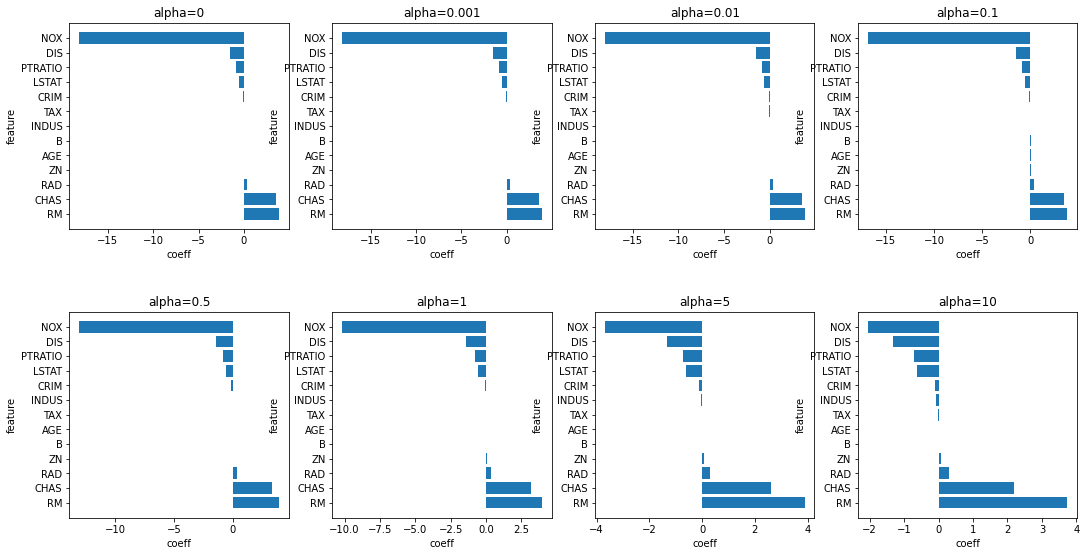

In [19]:
# alpha별 coff dataframe을 barchart로 시각화
plt.figure(figsize=(7,5)) # plot크기 설정

for index, alpha in enumerate(alphas):
    plt.subplot(2,4,index+1)
    plt.barh(df_ridge_coeff.sort_values('alpha:'+str(alpha), ascending=False).reset_index()['index'], df_ridge_coeff.sort_values('alpha:'+str(alpha) ,ascending=False)['alpha:'+str(alpha)])
    plt.title("alpha="+str(alpha)) #제목
    plt.xlabel('coeff') #x축 라벨
    plt.ylabel('feature') #y축 라벨

plt.subplots_adjust(left=2, right=4, top=1.5, hspace=0.4) #subplot간 간격 조절

>Ridge의 경우, alpha=0.1에서 최적

## Lasso

In [29]:
df_lasso_coeff = pd.DataFrame()
lasso_mse = list()

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    lasso_mse.append(mse)
    score_train = lasso.score(x_train, y_train) # 훈련set에 대한 결정계수
    score_test = lasso.score(x_test, y_test) # 테스트set에 대한 결정계수
    
    print("alpha : {0:<5},  training set score:{1:.3f}   test set score:{2:.3f}   mse:{3:.3f}".format(alpha, score_train, score_test, mse))
    
    df_lasso_coeff['alpha:'+str(alpha)] = pd.Series(data=lasso.coef_, index=x_train.columns)
    
df_lasso_coeff
    

alpha : 0    ,  training set score:0.756   test set score:0.635   mse:23.300
alpha : 0.001,  training set score:0.756   test set score:0.635   mse:23.289
alpha : 0.01 ,  training set score:0.756   test set score:0.637   mse:23.216
alpha : 0.1  ,  training set score:0.742   test set score:0.630   mse:23.659
alpha : 0.5  ,  training set score:0.728   test set score:0.627   mse:23.826
alpha : 1    ,  training set score:0.698   test set score:0.596   mse:25.819
alpha : 5    ,  training set score:0.582   test set score:0.512   mse:31.158
alpha : 10   ,  training set score:0.539   test set score:0.525   mse:30.342


,alpha:0,alpha:0.001,alpha:0.01,alpha:0.1,alpha:0.5,alpha:1,alpha:5,alpha:10
CRIM,-0.114557,-0.114377,-0.112723,-0.103673,-0.090771,-0.072868,-0.000000,-0.000000
ZN,0.053234,0.053292,0.053837,0.057183,0.059207,0.060763,0.046520,0.031696
INDUS,0.003283,0.001881,-0.009066,-0.056677,-0.018462,-0.000000,-0.000000,-0.000000
CHAS,3.508465,3.483955,3.261236,1.360602,0.000000,0.000000,0.000000,0.000000
NOX,-18.135667,-17.806571,-14.873198,-0.000000,-0.000000,-0.000000,0.000000,0.000000
RM,3.825239,3.827513,3.848649,3.815167,2.557393,0.953434,0.000000,0.000000
AGE,0.011058,0.010784,0.008316,-0.000994,0.014548,0.033638,0.045891,0.006171
DIS,-1.529967,-1.525143,-1.480458,-1.229727,-1.003764,-0.717474,-0.000000,-0.000000
RAD,0.339221,0.338515,0.332684,0.308078,0.318013,0.314801,0.000000,0.000000
TAX,-0.011868,-0.011893,-0.012162,-0.013845,-0.015152,-0.015775,-0.006157,-0.007893


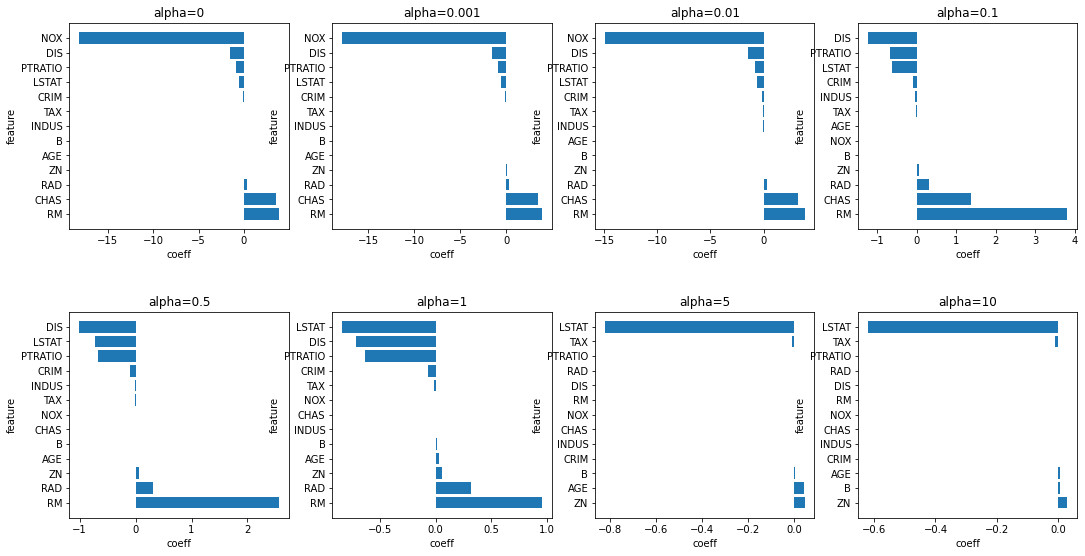

In [30]:
# alpha별 coff dataframe을 barchart로 시각화
plt.figure(figsize=(7,5)) # plot크기 설정

for index, alpha in enumerate(alphas):
    plt.subplot(2,4,index+1)
    plt.barh(df_lasso_coeff.sort_values('alpha:'+str(alpha), ascending=False).reset_index()['index'], df_lasso_coeff.sort_values('alpha:'+str(alpha) ,ascending=False)['alpha:'+str(alpha)])
    plt.title("alpha="+str(alpha)) #제목
    plt.xlabel('coeff') #x축 라벨
    plt.ylabel('feature') #y축 라벨

plt.subplots_adjust(left=2, right=4, top=1.5, hspace=0.4) #subplot간 간격 조절

> Lasso의 경우, alpha=0.01에서 최적

## ElasticNet

In [31]:
df_elnet_coeff = pd.DataFrame()
elnet_mse =  list()

for alpha in alphas:
    elnet = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elnet.fit(x_train, y_train)
    y_pred = elnet.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    elnet_mse.append(mse)

    score_train = elnet.score(x_train, y_train) # 훈련set에 대한 결정계수
    score_test = elnet.score(x_test, y_test) # 테스트set에 대한 결정계수

    print("alpha : {0:<5},  training set score:{1:.3f}   test set score:{2:.3f}   mse:{3:.3f}".format(alpha, score_train, score_test, mse))
        
    df_elnet_coeff['alpha:'+str(alpha)] = pd.Series(data=elnet.coef_, index=x_train.columns)
    
df_elnet_coeff
    

alpha : 0    ,  training set score:0.756   test set score:0.635   mse:23.300
alpha : 0.001,  training set score:0.756   test set score:0.636   mse:23.278
alpha : 0.01 ,  training set score:0.751   test set score:0.633   mse:23.451
alpha : 0.1  ,  training set score:0.741   test set score:0.630   mse:23.647
alpha : 0.5  ,  training set score:0.720   test set score:0.615   mse:24.619
alpha : 1    ,  training set score:0.701   test set score:0.596   mse:25.801
alpha : 5    ,  training set score:0.613   test set score:0.529   mse:30.104
alpha : 10   ,  training set score:0.561   test set score:0.524   mse:30.387


,alpha:0,alpha:0.001,alpha:0.01,alpha:0.1,alpha:0.5,alpha:1,alpha:5,alpha:10
CRIM,-0.114557,-0.113224,-0.108699,-0.105592,-0.097922,-0.086990,-0.027119,-0.000000
ZN,0.053234,0.053677,0.055499,0.059732,0.063846,0.063407,0.051541,0.048578
INDUS,0.003283,-0.007990,-0.046114,-0.062839,-0.042092,-0.019458,-0.000000,-0.000000
CHAS,3.508465,3.410062,2.898378,1.198444,0.000000,0.000000,0.000000,0.000000
NOX,-18.135667,-15.511230,-6.373856,-0.110019,-0.000000,-0.000000,-0.000000,0.000000
RM,3.825239,3.859874,3.930686,3.340980,1.748630,0.939394,0.000000,0.000000
AGE,0.011058,0.008539,0.000382,0.002112,0.021213,0.033383,0.054174,0.031446
DIS,-1.529967,-1.493598,-1.366113,-1.250302,-1.039637,-0.798261,-0.000000,-0.000000
RAD,0.339221,0.333451,0.315408,0.323165,0.349696,0.344586,0.156943,0.000000
TAX,-0.011868,-0.012063,-0.012836,-0.014323,-0.015963,-0.016452,-0.011748,-0.007707


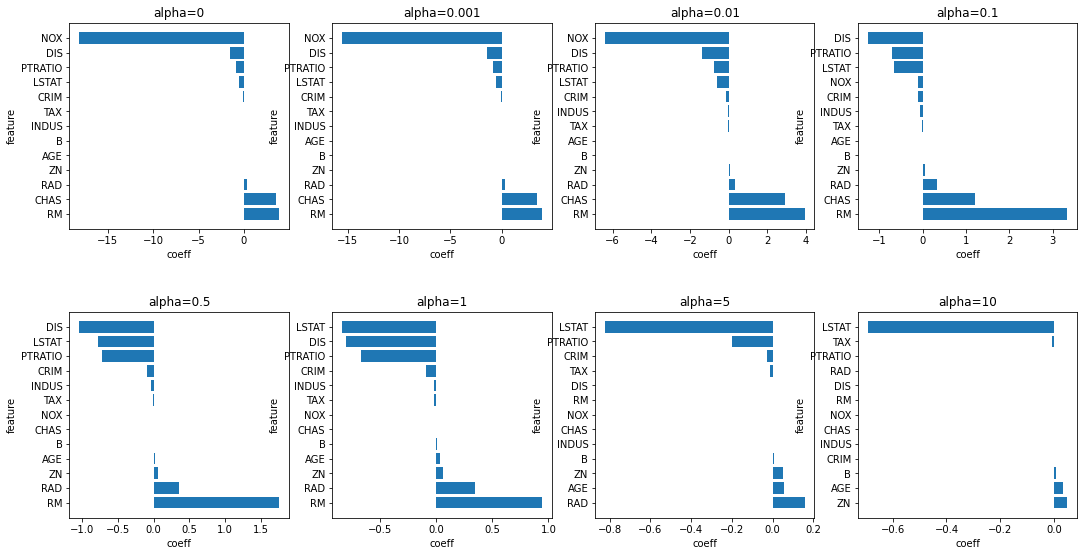

In [32]:
# alpha별 coff dataframe을 barchart로 시각화
plt.figure(figsize=(7,5)) # plot크기 설정

for index, alpha in enumerate(alphas):
    plt.subplot(2,4,index+1)
    plt.barh(df_elnet_coeff.sort_values('alpha:'+str(alpha), ascending=False).reset_index()['index'], df_elnet_coeff.sort_values('alpha:'+str(alpha) ,ascending=False)['alpha:'+str(alpha)])
    plt.title("alpha="+str(alpha)) #제목
    plt.xlabel('coeff') #x축 라벨
    plt.ylabel('feature') #y축 라벨

plt.subplots_adjust(left=2, right=4, top=1.5, hspace=0.4) #subplot간 간격 조절

> ElasticNet의 경우, alpha=0.001에서 최적

# 6. 각 모델의 solution path 차트

## 회귀계수

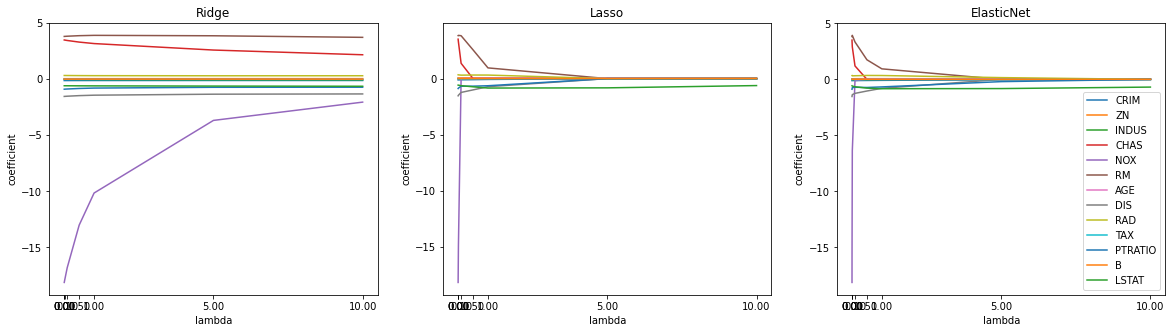

In [24]:
plt.figure(figsize=(20,5)) # plot크기 설정

# Ridge 
df_ridge_coeff.columns=alphas
plt.subplot(1,3,1)
plt.plot(df_ridge_coeff.T)
plt.xticks(alphas)
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.title('Ridge')

# Lasso 
df_lasso_coeff.columns=alphas
plt.subplot(1,3,2)
plt.plot(df_lasso_coeff.T)
plt.xticks(alphas)
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.title('Lasso')

# ElasticNet
df_elnet_coeff.columns=alphas
plt.subplot(1,3,3)
plt.plot(df_elnet_coeff.T)
plt.xticks(alphas)
plt.xlabel('lambda')
plt.ylabel('coefficient')
plt.title('ElasticNet')

plt.legend(df_elnet_coeff.index, loc='best') # 범례

plt.show()

## MSE

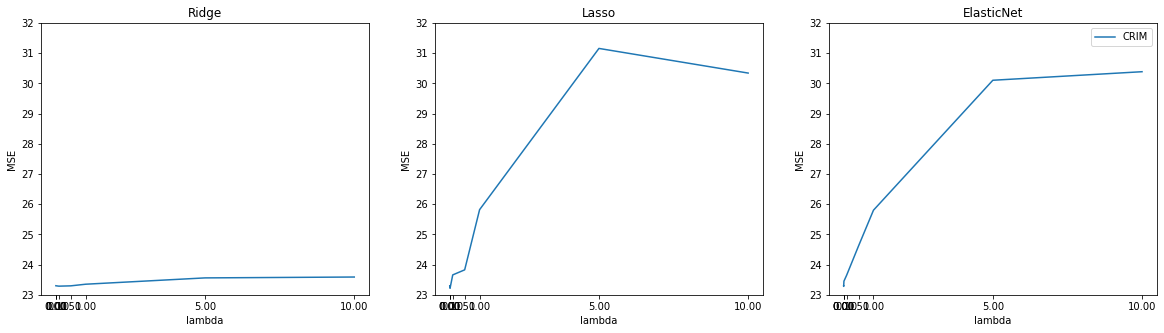

In [25]:
plt.figure(figsize=(20,5)) # plot크기 설정

# Ridge 
plt.subplot(1,3,1)
plt.plot(alphas, ridge_mse)
plt.xticks(alphas)
plt.xlabel('lambda')
plt.ylim(23,32)
plt.ylabel('MSE')

plt.title('Ridge')

# Lasso 
df_lasso_coeff.columns=alphas
plt.subplot(1,3,2)
plt.plot(alphas, lasso_mse)
plt.xticks(alphas)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.ylim(23,32)
plt.title('Lasso')

# ElasticNet
df_elnet_coeff.columns=alphas
plt.subplot(1,3,3)
plt.plot(alphas, elnet_mse)
plt.xticks(alphas)
plt.xlabel('lambda')
plt.ylabel('MSE')
plt.ylim(23,32)
plt.title('ElasticNet')

plt.legend(df_elnet_coeff.index, loc='best') # 범례

plt.show()

>Ridge의 경우, Lasso와 ElasticNet에 비해 alpha가 커져도 MSE가 크게 커지지 않는 편

# 7. 테스트 수행 (예측정확도 비교)

In [26]:
# 최적의 lambda로 학습 수행
ridge =  Ridge(alpha=0.1).fit(x_train, y_train)
lasso = Lasso(alpha=0.01).fit(x_train, y_train)
elnet = ElasticNet(alpha=0.001).fit(x_train, y_train)

# test set에 대해 예측 수행
y_pred_base = base_lr.predict(x_test)
y_pred_ridge = ridge.predict(x_test)
y_pred_lasso = lasso.predict(x_test)
y_pred_elnet = elnet.predict(x_test)

# MSE 
mse_base = mean_squared_error(y_test, y_pred_base)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elnet = mean_squared_error(y_test, y_pred_elnet)

In [27]:
print("[MSE]  ")
print("base MSE : %.3f" % mse_base)
print("Ridge MSE : %.3f"% mse_ridge)
print("Lasso MSE : %.3f"% mse_lasso)
print("ElasticNet MSE :%.3f" % mse_elnet)

print()
print("[모델 결정계수]  ")
print("base score : %.4f" % base_lr.score(x_test,y_test))
print("Ridge score : %.4f"% ridge.score(x_test,y_test))
print("Lasso score : %.4f"% lasso.score(x_test,y_test))
print("ElasticNet score : %.4f" % elnet.score(x_test,y_test))


[MSE]  
base MSE : 23.300
Ridge MSE : 23.286
Lasso MSE : 23.216
ElasticNet MSE :23.278

[모델 결정계수]  
base score : 0.6352
Ridge score : 0.6355
Lasso score : 0.6366
ElasticNet score : 0.6356


> Base모델 대비 정규화된 모델(Regularized models) 모두 예측 오차(MSE)가 작은 것을 알 수 있다.  <br>
예측성능이 가장 높은 순서(오차가 적은 순서)는 Lasso>ElasticNet>Ridge>Base 순이지만, 그 차이가 크지 않다. <br>

> 현재 데이터셋에서는 위와 같은 성능을 보였지만, 데이터마다 모델의 성능이 달라지므로 <br>
모델별 특징을 고려하여 해당 데이터셋에 맞는 모델을 찾아 적용하는 것이 좋다. 